# Импорт библиотек

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re
from nltk.stem.snowball import SnowballStemmer
from keras.utils import to_categorical
from tensorflow.keras import utils


from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam,Adadelta,SGD,Adagrad,RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
# подключаем колбэки
from tensorflow.keras.callbacks import LambdaCallback

from sklearn.preprocessing import StandardScaler
# Для разбивки на выборки
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Открытие датасета с помощью pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/train_prob/all_periods.csv",delimiter=";")
data.head()

<ipython-input-3-cba159cd9a08>:1: DtypeWarning: Columns (16,18,19,20,22,23,25,26,27,29,30,32,35,36,37,39,40,41,42,43,44,46,47,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,66,68,70,74,75,77,78,80,81,82,84,85,87,90,91,92,95,96,97,99,100,101,103,104,108,109,114,115,116,120,122,123,124,126,127,128,130,131,133,138,139,142,143,145,146,148,149,153,154,155,157,158,160,161,162,164,165,167,168,170,171,173,175,176,177,178,179,180,181,182,183,184,188,189,191,192,194,195,196,201,202,204,208,209,210,211,214,215,216,217,218,220,221,222,224,225,228,229,230,231,233,234,235,236,240,241,242,243,244,245,246,247,248,250,258,260,262,265,266,269,270,272,273,274,276,277,278,280,281,282,283,284,285,286,287,288) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/train_prob/all_periods.csv",delimiter=";")


,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Анализ данных

In [ ]:
print("Кол-во строк и столбцов = ", data.shape)

Кол-во строк и столбцов =  (32686, 289)


In [ ]:
print("Кол-во непустых записей в каждом столбце:")
data.count()

Кол-во непустых записей в каждом столбце:


ДокументПрохождениеМедосмотра    32686
Клиент                           32686
КлиентДатаРождения               32447
КлиентПол                        32682
КлиентПолПредставление           32682
                                 ...  
ЭКГНеИсп1_МКБ102                    22
ЭКГНеИсп2_МКБ101                    22
ЭКГНеИсп2_МКБ102                    22
Эндоскопия1_МКБ101                  94
Эндоскопия1_МКБ102                   6
Length: 289, dtype: int64

In [ ]:
print("Кол-во пустых записей в каждом столбце:")
data.isna().sum()

Кол-во пустых записей в каждом столбце:


ДокументПрохождениеМедосмотра        0
Клиент                               0
КлиентДатаРождения                 239
КлиентПол                            4
КлиентПолПредставление               4
                                 ...  
ЭКГНеИсп1_МКБ102                 32664
ЭКГНеИсп2_МКБ101                 32664
ЭКГНеИсп2_МКБ102                 32664
Эндоскопия1_МКБ101               32592
Эндоскопия1_МКБ102               32680
Length: 289, dtype: int64

In [ ]:
# Создадим копию датасета
data_copy = data.copy()

In [ ]:
# Удалим пустые колонки и проверим размер датасета до и после удаления
print("Размер до",data.shape)
proc = data.isna().sum().sum() / data.size
print("Общее количество пропусков во всей таблице в % - ", '{:.1%}'.format(proc))
data_copy = data_copy.dropna(axis = 1, how = 'all')
print("Размер после",data_copy.shape)
proc_copy = data_copy.isna().sum().sum() / data.size
print("Общее количество пропусков во всей таблице после удаления пустых колонок в % - ", '{:.1%}'.format(proc_copy))





Размер до (32686, 289)
Общее количество пропусков во всей таблице в % -  93.1%
Размер после (32686, 214)
Общее количество пропусков во всей таблице после удаления пустых колонок в % -  67.1%


## Анализ ключевого столба 'Заключение МК'

In [ ]:
print("Кол-во заполненных строк - ", data_copy['ЗаключениеМК'].count())
print("Кол-во пустых строк - ", data_copy['ЗаключениеМК'].isna().sum())
print("Типы записей:", data_copy['ЗаключениеМК'].unique())


Кол-во заполненных строк -  19205
Кол-во пустых строк -  13481
Типы записей: ['Годен' 'ГоденСКоррекциейЗрения' 'НуждаетсяВДообследованииИЛечении' nan
 'ГоденБезРаботНаВысотах' 'ГоденСКоррекциейСлуха' ' п. 11.3'
 'ОграниченноГоден' 'машинист бульдозера' 'Газоспасатель' ' Газоспасатель'
 'Негоден']


In [ ]:
# Удалим некорректные записи
for i in ('машинист бульдозера', 'Газоспасатель', ' Газоспасатель', ' п. 11.3'):
  data_copy = data_copy.drop(data_copy[data_copy['ЗаключениеМК']== i].index)
print("Типы записей после удаления:",data_copy['ЗаключениеМК'].unique())


Типы записей после удаления: ['Годен' 'ГоденСКоррекциейЗрения' 'НуждаетсяВДообследованииИЛечении' nan
 'ГоденБезРаботНаВысотах' 'ГоденСКоррекциейСлуха' 'ОграниченноГоден'
 'Негоден']


In [ ]:
# Приведём похожие записи к одному типу
for i in ('ГоденСКоррекциейЗрения','ГоденБезРаботНаВысотах', 'ГоденСКоррекциейСлуха'):
  data_copy['ЗаключениеМК'] = data_copy['ЗаключениеМК'].replace(i,'ОграниченноГоден')
print("Типы записей после замены:",data_copy['ЗаключениеМК'].unique())


Типы записей после замены: ['Годен' 'ОграниченноГоден' 'НуждаетсяВДообследованииИЛечении' nan
 'Негоден']


In [ ]:
# Заменим строку 'НуждаетсяВДообследованииИЛечении' и 'ВременноНегоден' на 'Негоден'

for i in ('НуждаетсяВДообследованииИЛечении','ВременноНегоден'):
  data_copy['ЗаключениеМК'] = data_copy['ЗаключениеМК'].replace(i,'Негоден')
print("Типы записей после замены:",data_copy['ЗаключениеМК'].unique())

Типы записей после замены: ['Годен' 'ОграниченноГоден' 'Негоден' nan]


In [ ]:
# Удалим пустые строки из столбца ЗаключениеМК
data_copy = data_copy.drop(data_copy[(data_copy['ЗаключениеМК'].isnull())].index)

# Проверим количество пустых строк после удаления
print("Кол-во пустых строк - ", data_copy['ЗаключениеМК'].isna().sum())
print("Типы записей после удаления:",data_copy['ЗаключениеМК'].unique())

Кол-во пустых строк -  0
Типы записей после удаления: ['Годен' 'ОграниченноГоден' 'Негоден']


In [ ]:
# Заменим столбец 'ЗаключениеМК' на массив в формате one-hot encoding. Годен - 0, Негоден - 1, ОграниченноГоден - 2

data_copy['ЗаключениеМК'] = data_copy['ЗаключениеМК'].replace({'Годен': 0, 'Негоден': 1, 'ОграниченноГоден': 2})

data_copy['ЗаключениеМК'].value_counts()

0    17982
2     1175
1       43
Name: ЗаключениеМК, dtype: int64

In [ ]:
# Сравениие количества строк и колонок копии датасета с исходным
print('Оригинальный датасет:')
print(f'Кол-во строк {data.shape[0]}')
print(f'Кол-во столбцов{data.shape[1]}')
print()
print('Копия датасета:')
print(f'Кол-во строк {data_copy.shape[0]}')
print(f'Кол-во столбцов{data_copy.shape[1]}')


Оригинальный датасет:
Кол-во строк 32686
Кол-во столбцов289

Копия датасета:
Кол-во строк 19200
Кол-во столбцов214


## Балансировка датасета

In [ ]:
# Удалим столбцы которые заполнены менее чем на 50%
null_col = data_copy.columns[data_copy.isna().any()].tolist()
for column in null_col:
  if data_copy[column].isna().sum()>0.5*len(data_copy):
    data_copy = data_copy.drop(column,axis = 1)
print('Оригинальный датасет:')
print(f'Кол-во строк {data.shape[0]}')
print(f'Кол-во столбцов{data.shape[1]}')
print()
print('Копия датасета:')
print(f'Кол-во строк {data_copy.shape[0]}')
print(f'Кол-во столбцов {data_copy.shape[1]}')


Оригинальный датасет:
Кол-во строк 32686
Кол-во столбцов289

Копия датасета:
Кол-во строк 19200
Кол-во столбцов 21


In [ ]:
# Если пропусков менее 50%, заменим пустые ячейки в столбцах на среднее значение в случае численного признака и на наиболее часто встречаемое значение в случае категориального.
for i in data_copy.columns:
  if data_copy[i].isna().sum()> 0:
    if data_copy[i].dtype == 'object':
      data_copy[i].fillna(data_copy[i].value_counts().index[0], inplace=True)
    elif data_copy[i].dtype != 'object':
      data_copy[i].fillna(data_copy[i].mean(), inplace=True)

In [ ]:
#Проверим пропуски после замены
count_null = data_copy.columns[data_copy.isna().any()].tolist()
print(f'Список колонок с пропусками: {len(count_null)}')

Список колонок с пропусками: 0


 Теперь наш датасет полностью заполнен. Далее работаем с категориальными переменными

In [ ]:
# Удалим столбцы которые идентичны

data_copy.drop('ТипМедосмотраПредставление',axis=1, inplace=True)
data_copy.drop('ЗаключениеМКПредставление',axis=1, inplace=True)
data_copy.drop('Заключение',axis=1, inplace=True)
data_copy.drop('КлиентПолПредставление',axis=1, inplace=True)

In [ ]:
data_copy

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,2021-02-02T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,0,23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,0,04.окт,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Младший продавец-консультант,0,23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Менеджер магазина,0,23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,2021-07-29T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,0,23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,06aefde6-0b7a-11ee-8133-0cc47aab8067,7db8d4db-36eb-11ec-80fa-0cc47aab8067,1973-09-17T00:00:00,Мужской,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"23,18.2,4.3.2,5.1,1.50",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
32513,24991372-0b7a-11ee-8133-0cc47aab8067,27c2fffd-ea16-11eb-80f6-0cc47aab8067,1992-04-28T00:00:00,Мужской,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"1.50,4.3.2,5.1,18.2,23",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
32514,42865c86-0b7a-11ee-8133-0cc47aab8067,2fc16ed1-dd28-11ea-80e2-0cc47aab8067,1980-03-18T00:00:00,Мужской,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"1.50,4.3.2,5.1,18.2,23",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
32515,5a8b26d3-0b7a-11ee-8133-0cc47aab8067,249ab785-af87-11e9-80cf-0cc47aab8067,1986-03-01T00:00:00,Мужской,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"1.50,4.3.2,5.1,18.2,23",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0


# Работа с обновлённым датасетом

In [ ]:
# Загружаю датасет с исправленной колонкой "ВредныеФакторы"

data_fix = pd.read_csv("/content/drive/MyDrive/train_prob/fix_fact.csv",delimiter=";", encoding='cp1251')



data_fix['ЗаключениеМК'] = data_fix['ЗаключениеМК'].replace({'Годен': 0, 'Негоден': 1, 'ОграниченноГоден': 2})
data_fix

,ДокументПрохождениеМедосмотра,Клиент,КлиентПол,Возраст,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,Женский,33.0,2021-02-02T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,0,23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,Женский,24.0,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,0,04.10.2023,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,Женский,21.0,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Младший продавец-консультант,0,23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,Женский,31.0,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Менеджер магазина,0,23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,Женский,24.0,2021-07-29T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,0,23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,06aefde6-0b7a-11ee-8133-0cc47aab8067,7db8d4db-36eb-11ec-80fa-0cc47aab8067,Мужской,49.0,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"23,18.2,4.3.2,5.1,1.50",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19196,24991372-0b7a-11ee-8133-0cc47aab8067,27c2fffd-ea16-11eb-80f6-0cc47aab8067,Мужской,31.0,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"1.50,4.3.2,5.1,18.2,23",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19197,42865c86-0b7a-11ee-8133-0cc47aab8067,2fc16ed1-dd28-11ea-80e2-0cc47aab8067,Мужской,43.0,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"1.50,4.3.2,5.1,18.2,23",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19198,5a8b26d3-0b7a-11ee-8133-0cc47aab8067,249ab785-af87-11e9-80cf-0cc47aab8067,Мужской,37.0,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"1.50,4.3.2,5.1,18.2,23",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0


## ЗаключениеМК

In [ ]:
# Преобразуем столбце 'ЗаключениеМК' в массив формата one-hot encoding

col_inx = data_fix.columns.get_loc('ЗаключениеМК')
col_lst = data_fix.iloc[:, col_inx].tolist()
# print(f'кЗаключениеМК: {len(col_lst)}: {col_lst}')
# print(f'data_fix число строк: {data_fix.shape[0]}')
# print(f'data_fix число колонок: {data_fix.shape[1]}')

i_arr = np.zeros(data_fix.shape[0], dtype=int)
for i in range(data_fix.shape[0]):
  i_arr[i] = col_lst[i]

# Преобразование массива в формат one_hot_encoding (3-класса)
i_arr2 = to_categorical(i_arr, 3)
ohe_lst2 = i_arr2.astype(int).tolist()
data_fix = data_fix.assign(кЗаключениеМК=ohe_lst2)
data_fix.insert(10, 'кЗаключениеМК', data_fix.pop('кЗаключениеМК'))
data_fix.tail(3)

,ДокументПрохождениеМедосмотра,Клиент,КлиентПол,Возраст,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,кЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101
19197,42865c86-0b7a-11ee-8133-0cc47aab8067,2fc16ed1-dd28-11ea-80e2-0cc47aab8067,Мужской,43.0,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"[1, 0, 0]","1.50,4.3.2,5.1,18.2,23",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19198,5a8b26d3-0b7a-11ee-8133-0cc47aab8067,249ab785-af87-11e9-80cf-0cc47aab8067,Мужской,37.0,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"[1, 0, 0]","1.50,4.3.2,5.1,18.2,23",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19199,72ae5658-0b7a-11ee-8133-0cc47aab8067,249ab786-af87-11e9-80cf-0cc47aab8067,Мужской,37.0,2023-06-15T00:00:00,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,0,"[1, 0, 0]","1.50,4.3.2,5.1,18.2,23",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0


## КлиентДатаРождения

In [ ]:
# Напишем фукнцию, которая заменит Дату рождения клиента на его текущий возраст

def replace_birthdate_with_age(dataset, birthdate_column):
    # Преобразование столбца с датой рождения в формат datetime
    dataset[birthdate_column] = pd.to_datetime(dataset[birthdate_column], format='%Y-%m-%dT%H:%M:%S',errors='coerce')

    # Вычисление разницы между текущей датой и датой рождения
    current_date = datetime.now()
    dataset['Возраст'] = (current_date - dataset[birthdate_column]).astype('<m8[Y]')

    # Удаление столбца с датой рождения
    dataset.drop(columns=[birthdate_column], inplace=True)

    return dataset

# Применим функцию

data_copy = replace_birthdate_with_age(data_copy, 'КлиентДатаРождения')

KeyError: ignored

In [ ]:
# Удалим из стобца 'Возраст' пустые строки
data_fix = data_fix.drop(data_fix[(data_fix['Возраст'].isnull())].index)
data_fix['Возраст'].isna().sum()


0

In [ ]:
# Представим стобец возраст в виде возрастной категории

def getParameterAgeVect(arg):
   outClass = int((arg-13)/5)
   outClass = max(0, min(10, outClass))
   return list(to_categorical(outClass, 11).astype('int'))

data_fix['Возраст'] = data_fix['Возраст'].apply(getParameterAgeVect)

In [ ]:
# Поставим Столбец возраст на своё место
#Проверим датасет
data_fix.insert(3, 'Возраст', data_fix.pop('Возраст'))
data_fix.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентПол,Возраст,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,Женский,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2021-02-02T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,"[1, 0, 0]",23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,Женский,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,"[1, 0, 0]",04.10.2023,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,Женский,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Младший продавец-консультант,"[1, 0, 0]",23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,Женский,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Менеджер магазина,"[1, 0, 0]",23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,Женский,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",2021-07-29T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,"[1, 0, 0]",23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0


## Вредные факторы

In [ ]:
# Разделем строки в столбце 'Вредные факторы' по запятым
def comma_string_split(arg):

  # результирующий список
  reslist = list()
  # проверяем на nan
  if (arg == arg):
    # проверяем, что строка не пустая
    if arg:
      # приводим к нижнему регистру, удаляем пробелы в начале и конце слова
      #str1 = arg.lower().strip()
      str1 = arg.strip()
      # разбиваем строку по запятым и возвращаем список
      str_lst1 = str1.split(',')
      for str_item1 in str_lst1:
        str_item2 = str_item1.strip()
        # проверяем, что строка не пустая
        if str_item2:
          reslist.append(str_item2)

  return reslist

In [ ]:
# Формируем столбец-список значений вредных факторов, заменяем nan - пустыми строками,
# убираем пробелы перед и после значений
col_inx = data_fix.columns.get_loc('ВредныеФакторы')
col_lst = data_fix.iloc[:, col_inx].tolist()

# bad factors
bad_f = [''] * data_fix.shape[0]

for i in range(data_fix.shape[0]):
  i_elem = col_lst[i]
  # проверяем на nan
  if (i_elem == i_elem):
    # проверяем, что строка не пустая
    if i_elem:
      #расщепляем по запятым
      elem_lst = comma_string_split(i_elem)
      bad_f[i] = ",".join(elem_lst)

print(f'bad_f: {len(bad_f)}: {bad_f}')

bad_f: 19195: ['23', '04.10.2023', '23', '23', '23', '23', '25', '4.4,5.1,15,6.1,11.4', '9,26', '18.02.2023', '18.02.2023', '18.02.2023', '3.1.7,1.1,1.23,1.39,4.4,5.1,11.1,6.1', '04.02.2005', '04.02.2005', '04.02.2005', '04.02.2005', '04.02.2005', '01.01.1948', '04.02.2005', '4.2.5,27', '04.02.2005', '04.02.2005', '04.02.2005', '04.02.2005', '04.02.2005', '04.02.2005', '4.2.5,4.4,11.1,18.1', '5.1,6,9,11.1,11.4', '4.2.5,4.2.5', '4.2.5,4.2.5', '4.2.5,6.1,9', '27', '27', '27', '27', '27', '27', '27', '27', '27', '4.2.5,27', '27', '11.1,11.1', '11.1,11.1', '1.29.2,4.2.5,4.4,4.7,6.2,11.1', '1.29.2,4.1,4.3.2,11.1,11.4,18.2', '23', '23', '14', '14', '1.50,11.3', '23', '23', '4.3.2,11.1,11.4,18.1,18.2', '18.02.2023', '5.1,6,17,5.1,6,17', '3.1.8,4.3.1,4.4,5.1,6,17,3.1.8,4.3.1,4.4,5.1,6,17', '3.1.8,4.3.1,4.4,5.1,6,17,3.1.8,4.3.1,4.4,5.1,6,17', '3.1.8,4.3.1,4.4,5.1,6,17,3.1.8,4.3.1,4.4,5.1,6,17', '3.1.8,4.3.1,4.4,5.1,6,17,3.1.8,4.3.1,4.4,5.1,6,17', '3.1.8,4.3.1,4.4,5.1,6,17,3.1.8,4.3.1,4.4,5.1,6,

In [ ]:
# Формируем список уникальных значений вредных факторов
# Harmful Factors
u_bad_f = list()

for i in range(len(bad_f)):
  i_elem = bad_f[i]
  # проверяем на nan
  if (i_elem == i_elem):
    # проверяем, что строка не пустая
    if i_elem:
      #расщепляем по запятым
      elem_lst = comma_string_split(i_elem)
      if len(elem_lst) > 0:
        for elem1_lst in elem_lst:
          if len(u_bad_f) > 0:
            # проверяем, что этого элемента нет в списке
            if not (elem1_lst in u_bad_f):
              u_bad_f.append(elem1_lst)
          else:
            u_bad_f.append(elem1_lst)

print(f'{len(u_bad_f)}: u_bad_f: {u_bad_f}')

182: u_bad_f: ['23', '04.10.2023', '25', '4.4', '5.1', '15', '6.1', '11.4', '9', '26', '18.02.2023', '3.1.7', '1.1', '1.23', '1.39', '11.1', '04.02.2005', '01.01.1948', '4.2.5', '27', '18.1', '6', '1.29.2', '4.7', '6.2', '4.1', '4.3.2', '18.2', '14', '1.50', '11.3', '17', '3.1.8', '4.3.1', '12', '13', '1.36', '8', '18', '4.2.1', '4.8', '1.30.1', '1.45.1', '3.1.8.2', '3.1.8.3', '11.01.2023', '1.14.2', '11', '3.4', '2.4.3', '4.3', '3.1.2', '1.36.1', '3.1.1', '4.2', '1.37.1', '1.15', '4.2.2', '4.2.3', '4.2.4', '4.5', '4.9', '1.3', '1.5', '18.01.2023', '04.01.2023', '1.48', '05.01.2023', '24', '04.02.2003', '5.2', '1.42', '4.6', '1.15.1', '1.29.1', '22', '10', '11.04.2023', '1.37.2', '3.1', '1.51', '1.52', '3.1.8.1', '1.2', '1.10', '1.30', '1.37', '1.38', '1.40', '4.10', '5.2.1', '06.01.2023', '06.02.2023', '04.07.2023', '04.08.2023', '1.5.1', '1.8.1', '3.1.3', '04.04.2023', '11.2', '2.3', '2.4.1', '2.4.2', '1.36.2', '04.03.2002', '01.02.2023', '1.24', '3.1.5', '1.53.2', '01.01.1946', '1.8

In [ ]:
# Оценим число повторений ВредныхФакторов,
# будем использовать в нейросети только наиболее частые,
# остальные, которые встречаются редко обозначим - "все остальные"
# Создаем словарь ВредныеФакторы: ключи - названия вредных факторов, значения - число повторений
u_bad_f_dict = {}
for i_elem in u_bad_f:
  u_bad_f_dict[i_elem] = 0

# пробегаемся по всем строкам колонки и заполняем словарь
for i in range(len(bad_f)):
  i_elem = bad_f[i]
  # проверяем на nan
  if (i_elem == i_elem):
    # проверяем, что строка не пустая
    if i_elem:
      #расщепляем по запятым
      elem_lst = comma_string_split(i_elem)
      if len(elem_lst) > 0:
        for elem1_lst in elem_lst:
          u_bad_f_dict[elem1_lst] += 1


# сортируем словарь по убыванию
u_bad_f_sort_dict = dict(sorted(u_bad_f_dict.items(), key=lambda x: x[1], reverse=True))


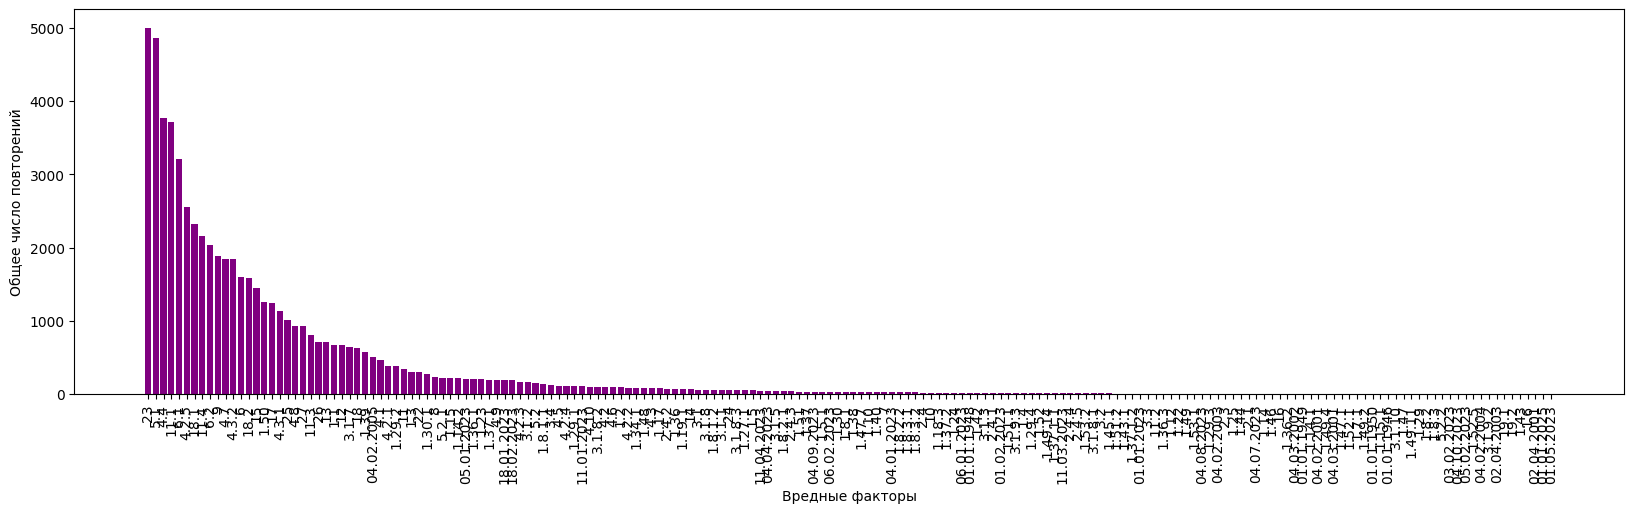

In [ ]:
# Отобразим на столбчатую диаграмму - частоту использования наших признаков
plt.figure(figsize=(20, 5))
plt.bar(u_bad_f_sort_dict.keys(), u_bad_f_sort_dict.values(), color='purple')
plt.xticks(rotation=90)
plt.xlabel('Вредные факторы')
plt.ylabel('Общее число повторений')
plt.gca().set_facecolor('white')
plt.show()

In [ ]:
# Выберем на основе графика первые 45 признаков

u_bad_f_lst = list(u_bad_f_sort_dict.keys())[:45]

print(f'{len(u_bad_f_lst)}: u_hf_lst: {u_bad_f_lst}')

45: u_hf_lst: ['23', '5.1', '4.4', '11.1', '6.1', '4.2.5', '18.1', '11.4', '6.2', '9', '4.7', '4.3.2', '6', '18.2', '15', '1.50', '17', '4.3.1', '25', '4.8', '27', '11.3', '26', '13', '1.1', '12', '3.1.7', '18', '1.39', '04.02.2005', '4.1', '4.2.1', '1.29.2', '11', '1.3', '22', '1.30.1', '8', '5.2.1', '1.15', '1.14.2', '05.01.2023', '1.36.1', '1.23', '1.37.1']


In [ ]:
#multi_hot_encoding
bad_f_mhe = list()

# число классов
harmful_factors_class_count = len(u_bad_f_lst) + 1
# то есть по умолчанию выбираем индекс вредного фактора, которого нет в списке
# наших выбранных и ограниченных уникальных вредных факторов - вредный фактор - `все остальные`
nan_inx = len(u_bad_f_lst)

# пробегаемся по всем строкам колонки
for i in range(len(bad_f)):
  i_elem = bad_f[i]
  # устанавливаем все признаки в нули
  i_mhe_lst = [0] * harmful_factors_class_count
  # проверяем на nan
  if (i_elem == i_elem):
    # проверяем, что строка не пустая
    if i_elem:
      #расщепляем по запятым
      elem_lst = comma_string_split(i_elem)
      if len(elem_lst) > 0:
        for elem1_lst in elem_lst:
          # проверяем, есть ли этот элемент в списке
          if elem1_lst in u_bad_f_lst:
            inx = u_bad_f_lst.index(elem1_lst)
            i_mhe_lst[inx] = 1
          else:
            i_mhe_lst[nan_inx] = 1
      else:
        i_mhe_lst[nan_inx] = 1
    else:
      i_mhe_lst[nan_inx] = 1
  else:
    i_mhe_lst[nan_inx] = 1


  bad_f_mhe.append(i_mhe_lst)

data_fix['ВредныеФакторы'] = bad_f_mhe

In [ ]:
data_fix.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентПол,Возраст,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,Женский,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2021-02-02T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,"[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,Женский,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,"[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,Женский,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Младший продавец-консультант,"[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,Женский,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Менеджер магазина,"[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,Женский,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",2021-07-29T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,"[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0


## ПсихОсвидетельствование

In [ ]:
# Заменим bool значения в столбце на 0 и 1. 0 - False, 1 - True
def bool_to_int(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: int(x))
    return df

data_fix = bool_to_int(data_fix, 'ПсихОсвидетельствование')

data_fix.tail(3)

,ДокументПрохождениеМедосмотра,Клиент,КлиентПол,Возраст,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101
19197,42865c86-0b7a-11ee-8133-0cc47aab8067,2fc16ed1-dd28-11ea-80e2-0cc47aab8067,Мужской,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19198,5a8b26d3-0b7a-11ee-8133-0cc47aab8067,249ab785-af87-11e9-80cf-0cc47aab8067,Мужской,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19199,72ae5658-0b7a-11ee-8133-0cc47aab8067,249ab786-af87-11e9-80cf-0cc47aab8067,Мужской,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0


## ТипМедосмотра

In [ ]:
# Заменим  значения в столбце ПсихОсвидетельствование  на 0 и 1. Периодический - 0, Предварительный - 1
data_fix['ТипМедосмотра'] = data_fix['ТипМедосмотра'].replace({'Периодический	': 0, 'Предварительный': 1})
data_fix.tail(3)

,ДокументПрохождениеМедосмотра,Клиент,КлиентПол,Возраст,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101
19197,42865c86-0b7a-11ee-8133-0cc47aab8067,2fc16ed1-dd28-11ea-80e2-0cc47aab8067,Мужской,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19198,5a8b26d3-0b7a-11ee-8133-0cc47aab8067,249ab785-af87-11e9-80cf-0cc47aab8067,Мужской,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19199,72ae5658-0b7a-11ee-8133-0cc47aab8067,249ab786-af87-11e9-80cf-0cc47aab8067,Мужской,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0


## КлиентПол

In [ ]:
data_fix['КлиентПол'] = data_fix['КлиентПол'].replace({'Женский': 0, 'Мужской': 1})
data_fix.tail(3)

,ДокументПрохождениеМедосмотра,Клиент,КлиентПол,Возраст,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101
19197,42865c86-0b7a-11ee-8133-0cc47aab8067,2fc16ed1-dd28-11ea-80e2-0cc47aab8067,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19198,5a8b26d3-0b7a-11ee-8133-0cc47aab8067,249ab785-af87-11e9-80cf-0cc47aab8067,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
19199,72ae5658-0b7a-11ee-8133-0cc47aab8067,249ab786-af87-11e9-80cf-0cc47aab8067,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель автомобиля,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0


## Профессиия

In [ ]:
# Оставим в столбце Профессии только первое слово

def extract_single_word(row):
    words = row.split() # разделение строки на слова
    return words[0]  # возвращаем только первое слово

data_fix['Профессия'] = data_fix['Профессия'].apply(extract_single_word)

In [ ]:
# Преобразуем столбцец профессия в массив категориальных данных

def profession_to_list(df, col_name):
    # создаем новый столбец с списком профессий
    df[col_name+'_list'] = df[col_name].apply(lambda x: [int(x==p) for p in df[col_name].unique()])
    return df

data_fix = profession_to_list(data_fix, 'Профессия')




In [ ]:
# проверка

data_fix['ВредныеФакторы'].value_counts()[:60]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]    3765
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]     893
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]     888
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]     540
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]     510
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]     403
[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Подготовка датафреймов создания и обучения НС

In [ ]:
data_fix

,ДокументПрохождениеМедосмотра,Клиент,КлиентПол,Возраст,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101,Профессия_list
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2021-02-02T00:00:00,Периодический,0,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,"[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",2021-04-13T00:00:00,Периодический,0,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,"[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2021-04-13T00:00:00,Периодический,0,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Младший,"[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",2021-04-13T00:00:00,Периодический,0,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Менеджер,"[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",2021-07-29T00:00:00,Периодический,0,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,"[1, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,06aefde6-0b7a-11ee-8133-0cc47aab8067,7db8d4db-36eb-11ec-80fa-0cc47aab8067,1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
19196,24991372-0b7a-11ee-8133-0cc47aab8067,27c2fffd-ea16-11eb-80f6-0cc47aab8067,1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
19197,42865c86-0b7a-11ee-8133-0cc47aab8067,2fc16ed1-dd28-11ea-80e2-0cc47aab8067,1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
19198,5a8b26d3-0b7a-11ee-8133-0cc47aab8067,249ab785-af87-11e9-80cf-0cc47aab8067,1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",2023-06-15T00:00:00,Периодический,0,961bfdc2-9d18-11eb-80eb-0cc47aab8067,Водитель,"[1, 0, 0]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...",Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
# Создаём новый датафрейм, который будет содержать уже чистые параметры для обучения НС
# Удалим строку 'НеУказан' в столбце 'КлиентПол'

data_fix = data_fix[data_fix.КлиентПол != 'НеУказан']

parametrs = pd.DataFrame()

parametrs = pd.concat([data_fix['ЗаключениеМК'], data_fix['КлиентПол'], data_fix['Возраст'],
                       data_fix['ПсихОсвидетельствование'], data_fix['Профессия_list'], data_fix['ВредныеФакторы']], axis = 1)

data_fix['КлиентПол'].value_counts()
parametrs
#parametrs.to_csv('check.csv', sep = ';', encoding='cp1251')

,ЗаключениеМК,КлиентПол,Возраст,ПсихОсвидетельствование,Профессия_list,ВредныеФакторы
0,"[1, 0, 0]",0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 0, 0]",0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 0, 0]",0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[1, 0, 0]",0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[1, 0, 0]",0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
19195,"[1, 0, 0]",1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
19196,"[1, 0, 0]",1,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
19197,"[1, 0, 0]",1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
19198,"[1, 0, 0]",1,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."


## Подготовка меток для обучения

In [ ]:
df_y = data_fix['ЗаключениеМК'].apply(pd.Series)

df_y.tail(3)

,0,1,2
19197,1,0,0
19198,1,0,0
19199,1,0,0


In [ ]:
# преобразуем в numpy массив типа float
y_data = df_y.astype(np.float32).to_numpy()
print(f'количество значений: {y_data.size}')

количество значений: 57582


## Подготовка параметров

In [ ]:
# трансформируем one-multi-hot-encoding списки в отдельные колонки
split_col_names = list()
#~~~~~~~~~~~~~~~~~~~~~~~~
split_col_names.append('кЗаключениеМК')
split_col_names.append('Возраст')
split_col_names.append('ВредныеФакторы')
split_col_names.append('Профессия_list')
#~~~~~~~~~~~~~~~~~~~~~~~~

for col_name in split_col_names:
  parametrs = pd.concat([parametrs.drop(col_name, axis=1), parametrs[col_name].apply(pd.Series)], axis=1)

del split_col_names

print(f'размеры датафрейма parametrs: {parametrs.shape}')
print('='*50)
parametrs.tail(3)


размеры датафрейма parametrs: (19194, 870)


,КлиентПол,ПсихОсвидетельствование,0,1,2,0,1,2,3,4,...,798,799,800,801,802,803,804,805,806,807
19197,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19198,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19199,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_data = parametrs.astype(np.float32).to_numpy()

print('x_data:')
print(f'  количество осей: {x_data.ndim}')
print(f'  форма массива: {x_data.shape}')
print(f'  количество значений: {x_data.size}')

x_data_row, x_data_col = x_data.shape
print(f'  число строк: {x_data_row}')
print(f'  число колонок: {x_data_col}')




x_data:
  количество осей: 2
  форма массива: (19194, 870)
  количество значений: 16698780
  число строк: 19194
  число колонок: 870


Разделение датасета на 2 части: тестовая и проверочная

In [ ]:
# TEST_DATA_SIZE, VALID_DATA_SIZE
TEST_DATA_SIZE = 0.20
VALID_DATA_SIZE = 0.20

test_count = int(x_data_row*TEST_DATA_SIZE)
print(f'test_count: {test_count}')

test_count: 3838


In [ ]:
x_test = x_data[:test_count]
y_test = y_data[:test_count]
print('x_test:')
print(f'  количество осей: {x_test.ndim}')
print(f'  форма массива: {x_test.shape}')
print(f'  количество значений: {x_test.size}')
print('y_test:')
print(f'  количество осей: {y_test.ndim}')
print(f'  форма массива: {y_test.shape}')
print(f'  количество значений: {y_test.size}')

x_test:
  количество осей: 2
  форма массива: (3838, 870)
  количество значений: 3339060
y_test:
  количество осей: 2
  форма массива: (3838, 3)
  количество значений: 11514


In [ ]:
x_train = x_data[test_count:]
y_train = y_data[test_count:]
print('x_train:')
print(f'  количество осей: {x_train.ndim}')
print(f'  форма массива: {x_train.shape}')
print(f'  количество значений: {x_train.size}')
print('y_train:')
print(f'  количество осей: {y_train.ndim}')
print(f'  форма массива: {y_train.shape}')
print(f'  количество значений: {y_train.size}')

x_train:
  количество осей: 2
  форма массива: (15356, 870)
  количество значений: 13359720
y_train:
  количество осей: 2
  форма массива: (15356, 3)
  количество значений: 46068


# Обучения нейронной сети

In [ ]:
# Настройки для обучения сети
LEARNING_RATE = 1e-3
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 1

In [ ]:
# Напишем функцию, которая будет отрисовывать результаты обучения нашей НС

def printNNChart(history_n):
  '''
    Отображенние на графике результатов работы нейронной сети (Neural Network)
    вход:
        history_n: массив результатов работы нейросети
  '''
  # Создание полотна для рисунка
  plt.figure(figsize=(18,5))

  # Задание первой (левой) области для построения графиков
  plt.subplot(1, 2, 1)
  # Отрисовка графиков 'loss' и 'val_loss' из значений словаря history.history
  plt.plot(history_n.history['loss'],
           color='blue',
           label = 'Значение ошибки на обучающем наборе')
  plt.plot(history_n.history['val_loss'],
           color='red',
           label = 'Значение ошибки на проверочном наборе')
  # Задание подписей осей
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Значение ошибки')
  plt.legend()
  plt.grid(which = 'major', color = 'black', alpha = 0.3)
  plt.minorticks_on()
  plt.grid(which = 'minor', color = 'gray', linestyle = '--', alpha = 0.3)

  # Задание второй (правой) области для построения графиков
  plt.subplot(1, 2, 2)
  # Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря history.history
  plt.plot(history_n.history['accuracy'],
           color='blue',
           label = 'Доля верных ответов на обучающем наборе')
  plt.plot(history_n.history['val_accuracy'],
           color='red',
           label = 'Доля верных ответов на проверочном наборе')
  # Задание подписей осей
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.grid(which = 'major', color = 'black', alpha = 0.3)
  plt.minorticks_on()
  plt.grid(which = 'minor', color = 'gray', linestyle = '--', alpha = 0.3)

  # Фиксация графиков и рисование всей картинки
  plt.show()

In [ ]:
# Создание модели
model1 = Sequential()

# Добавление слоев
model1.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))

model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(30))

model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(10))

model1.add(Dense(3, activation = 'softmax'))

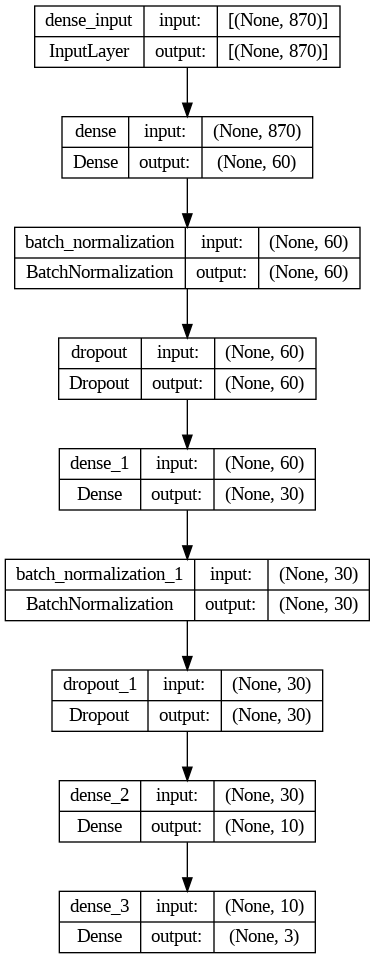

In [ ]:
utils.plot_model(model1, show_shapes=True)

In [ ]:
model1.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate=LEARNING_RATE),
               metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_train,                             # Обучающая выборка параметров
                      y_train,                             # Обучающая выборка целевого результата
                      batch_size=BATCH_SIZE,               # Размер батча (пакета)
                      epochs=EPOCHS,                       # Количество эпох обучения
                      validation_split=VALID_DATA_SIZE,    # Доля валидационной-корректирующей выборки
                      verbose=VERBOSE)                     # Отображение хода обучения

Epoch 1/10
96/96 [==============================] - 3s 9ms/step - loss: 0.7209 - accuracy: 0.7223 - val_loss: 0.2608 - val_accuracy: 0.9974
Epoch 2/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0744 - accuracy: 0.9925 - val_loss: 0.0719 - val_accuracy: 0.9984
Epoch 3/10
96/96 [==============================] - 1s 7ms/step - loss: 0.0142 - accuracy: 0.9989 - val_loss: 0.0309 - val_accuracy: 0.9993
Epoch 4/10
96/96 [==============================] - 1s 5ms/step - loss: 0.0071 - accuracy: 0.9994 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 5/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0048 - accuracy: 0.9995 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/10
96/96 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/10
96/96 [==============================] - 1s 6ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 8.3314e-04 - val_accuracy: 1.0000
Epoch 8/10
96/96

# Оценка результатов

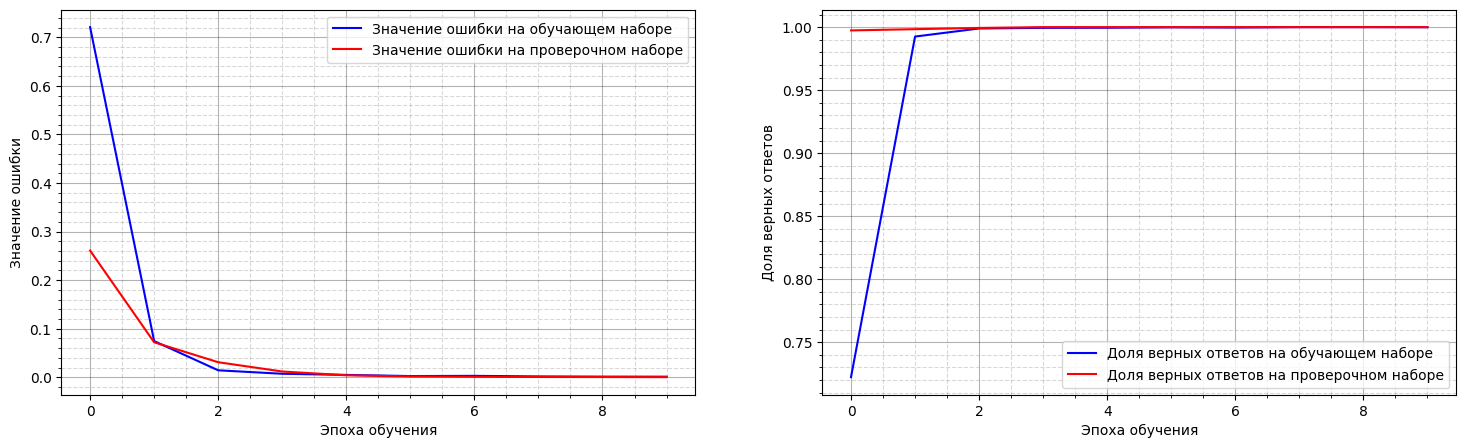

In [ ]:
printNNChart(history1)

In [ ]:
# Оценим результат работы нашей сети.
# Применим метод .evaluate() к нашей модели, в качестве параметров
# передадим ему тестовые выборки и согласие на отображение хода вычисления.

scores1 = model1.evaluate(x_test,
                          y_test,
                          verbose=1)

print('Процент верных ответов на тестовых данных:', round(scores1[1],2) * 100, '%')

120/120 [==============================] - 1s 3ms/step - loss: 1.5105e-04 - accuracy: 1.0000
Процент верных ответов на тестовых данных: 100.0 %


In [ ]:
# Вывод значения точности распознавания на проверочной выборке по эпохам
val_acc1 = history1.history['val_accuracy']
i_max = 0
val_acc_max = -1.0
# print(f'Эпохи: {EPOCHS}')
for i in range(EPOCHS):
  # print(f'  {i}->{EPOCHS}: {round(val_acc1[i], 3)}%')
  if val_acc1[i] > val_acc_max:
    val_acc_max = val_acc1[i]
    i_max = i

print(f'Нейронная сеть под номером: {i_max} из {EPOCHS} эпох')
print(f'  достигла точности: {round(val_acc1[i]*100., 3)}%')

Нейронная сеть под номером: 3 из 10 эпох
  достигла точности: 100.0%


# Оценка точности нейронной сети на тестовой выборке

In [ ]:
pred1 = model1.predict(x_test)

# У нас три класса:
# 0 - не годен, 1 - ограниченно годен, 2 - годен
# Подсчитаем по каждому верное и неверное предсказания
arr_true = np.zeros(3, dtype=int)
arr_false = np.zeros(3, dtype=int)

for i in range(y_test.shape[0]):
  # Получение индекса самого большого элемента
  # потому что мы имеем дело с one-hot-encoding, поэтому необходимо
  # определить элемент в массиве с максимальным значением,
  # индекс этого элемента и будет говорить о верном элементе
  #~индекс тестового элемента
  y_inx_max = np.argmax(y_test[i,:])
  #~индекс предсказанного элемента
  pred_inx_max = np.argmax(pred1[i,:])
  #~~~
  if y_inx_max == pred_inx_max:
    # верное предсказание
    arr_true[y_inx_max] += 1
  else:
    # неверное предсказания
    arr_false[y_inx_max] += 1

# Результаты предсказаний по тестовой выборке
print('Результаты предсказаний по тестовой выборке:')
print(f'  размер тествой выборки: {y_test.shape[0]}')
print(f'  0 - годен, предсказания:')
print(f'     верное: {arr_true[0]}')
print(f'     неверное: {arr_false[0]}')
print(f'  1 - негоден, предсказания:')
print(f'     верное: {arr_true[1]}')
print(f'     неверное: {arr_false[1]}')
print(f'  2 - ограниченно годен:')
print(f'     верное: {arr_true[2]}')
print(f'     неверное: {arr_false[2]}')
print(f'  проверочная сумма (сумма всех значений): {y_test.shape[0]} = {arr_true[0]+arr_false[0]+arr_true[1]+arr_false[1]+arr_true[2]+arr_false[2]}')

120/120 [==============================] - 0s 2ms/step
Результаты предсказаний по тестовой выборке:
  размер тествой выборки: 3838
  0 - не годен, предсказания:
     верное: 3628
     неверное: 0
  1 - ограниченно годен, предсказания:
     верное: 11
     неверное: 0
  2 - годен:
     верное: 199
     неверное: 0
  проверочная сумма (сумма всех значений): 3838 = 3838


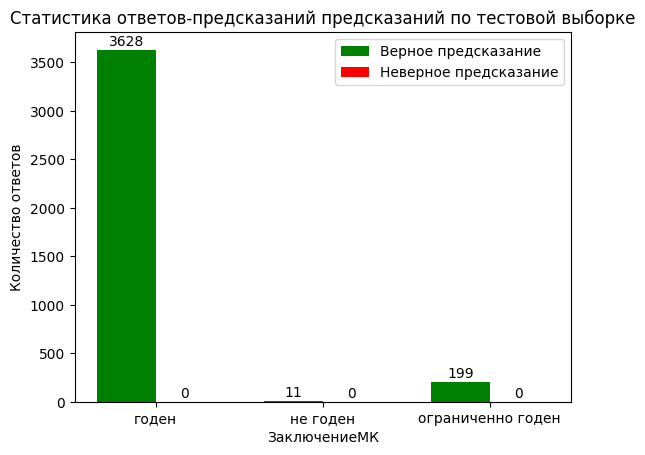

In [ ]:
fig, ax = plt.subplots()

conclusion_lst = ['годен', 'не годен', 'ограниченно годен']
index = np.arange(len(conclusion_lst))
bar_width = 0.35

rects1 = ax.bar(index, arr_true, bar_width, color='g', label='Верное предсказание')
rects2 = ax.bar(index + bar_width, arr_false, bar_width, color='r', label='Неверное предсказание')

ax.set_xlabel('кЗаключениеМК')
ax.set_ylabel('Количество ответов')
ax.set_title('Статистика ответов-предсказаний предсказаний по тестовой выборке')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(conclusion_lst)

ax.legend()

for rect, value in zip(rects1, arr_true):
    height = rect.get_height()
    ax.annotate('{}'.format(value),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center', va='bottom')

for rect, value in zip(rects2, arr_false):
    height = rect.get_height()
    ax.annotate('{}'.format(value),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# Заключение

По результатам анализа предоставленного датасета, можно заметить, что из-за разбалансировки в  столбце 'ЗаключениеМК' нейронная сеть просто заучила предоставленные результаты и на основе этого почти в самом начале нейронная сеть выдала 100% результат, но на деле если она будет пытаться предсказать ограниченно годного или негодного клиента, на основе других параметров, то скорее всего она допустит ошибку.

# Работа с приказом №29H

# Оформление вердикта

Берём из тестовой выборки 3 записи со всеми возможными значениями 'ЗаключениеМК' (0 - не годен, 1 - ограниченно годен, 2 - годен) и сформируем по ним дополнение вердикта данными из приказа №29Н.

In [ ]:
inx0 = -1
inx1 = -1
inx2 = -1

col_inx = data_fix.columns.get_loc('ЗаключениеМК')
col_lst = data_fix.iloc[:, col_inx].tolist()
# print(f'кЗаключениеМК: {len(col_lst)}: {col_lst}')

for i in range(y_test.shape[0]):
  i_elem = col_lst[i]
  print(f'i: {i} -> {y_test.shape[0]}, i_elem: {i_elem}')
  if 0 == i_elem and -1 == inx0:
    inx0 = i
  elif 1 == i_elem and -1 == inx1:
    inx1 = i
  elif 2 == i_elem and -1 == inx2:
    inx2 = i

  if (not -1 == inx0) and (not -1 == inx1) and (not -1 == inx2):
    break

print('кЗаключениеМК:')
print(f'  0 - годен: строка {inx0}')
print(f'  1 - негоден: строка {inx1}')
print(f'  2 - ограниченно годен: строка {inx2}')

i: 0 -> 3838, i_elem: 0
i: 1 -> 3838, i_elem: 0
i: 2 -> 3838, i_elem: 0
i: 3 -> 3838, i_elem: 0
i: 4 -> 3838, i_elem: 0
i: 5 -> 3838, i_elem: 0
i: 6 -> 3838, i_elem: 0
i: 7 -> 3838, i_elem: 0
i: 8 -> 3838, i_elem: 0
i: 9 -> 3838, i_elem: 0
i: 10 -> 3838, i_elem: 0
i: 11 -> 3838, i_elem: 0
i: 12 -> 3838, i_elem: 0
i: 13 -> 3838, i_elem: 0
i: 14 -> 3838, i_elem: 0
i: 15 -> 3838, i_elem: 0
i: 16 -> 3838, i_elem: 0
i: 17 -> 3838, i_elem: 0
i: 18 -> 3838, i_elem: 0
i: 19 -> 3838, i_elem: 0
i: 20 -> 3838, i_elem: 0
i: 21 -> 3838, i_elem: 0
i: 22 -> 3838, i_elem: 0
i: 23 -> 3838, i_elem: 2
i: 24 -> 3838, i_elem: 0
i: 25 -> 3838, i_elem: 0
i: 26 -> 3838, i_elem: 0
i: 27 -> 3838, i_elem: 0
i: 28 -> 3838, i_elem: 0
i: 29 -> 3838, i_elem: 0
i: 30 -> 3838, i_elem: 0
i: 31 -> 3838, i_elem: 0
i: 32 -> 3838, i_elem: 0
i: 33 -> 3838, i_elem: 0
i: 34 -> 3838, i_elem: 0
i: 35 -> 3838, i_elem: 0
i: 36 -> 3838, i_elem: 0
i: 37 -> 3838, i_elem: 0
i: 38 -> 3838, i_elem: 0
i: 39 -> 3838, i_elem: 0
i: 40 -> 3

In [ ]:
data_fix.head(5)

,ДокументПрохождениеМедосмотра,Клиент,КлиентПол,Возраст,ДатаЗавершенияМедосмотра,ТипМедосмотра,ПсихОсвидетельствование,Контрагент,Профессия,ЗаключениеМК,кЗаключениеМК,ВредныеФакторы,Дерматовенерология1_МКБ101,Неврология1_МКБ101,Оториноларингология1_МКБ101,Офтальмология1_МКБ101,ПсихиатрияНаркология1_МКБ101,Терапия1_МКБ101
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,Женский,33.0,2021-02-02T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,0,"[1, 0, 0]",23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,Женский,24.0,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,0,"[1, 0, 0]",04.10.2023,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,Женский,21.0,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Младший продавец-консультант,0,"[1, 0, 0]",23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,Женский,31.0,2021-04-13T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Менеджер магазина,0,"[1, 0, 0]",23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,Женский,24.0,2021-07-29T00:00:00,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,Продавец-кассир,0,"[1, 0, 0]",23,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0,Z00.0


In [ ]:
# Получение значения ячейки по названию колонки и номеру строки

def get_df_cell_value(col_name, row_inx):
  '''
    Получение значения ячейки по названию колонки и номеру строки
    вход:
        col_name: название колонки в оригинальном датасете
        row_inx: индекс строки в оригинальном датасете
    выход:
        retVal2: значение ячейки в строковом формате
  '''
  col_inx = data_fix.columns.get_loc(col_name)
  retVal1 = data_fix.iloc[row_inx, col_inx]
  if not (retVal1 == retVal1):
    retVal1 = ''
  retVal2 = str(retVal1)
  return retVal2

In [ ]:
# Удаление ошибочных символов в строке

def remove_error_symbol(err_str):
  '''
    Удаление ошибочных символов в строке
    вход:
        err_str: строка с ошибочными сиволами
    выход:
        retVal: строка без ошибочных сиволов
  '''
  retVal = err_str
  if len(retVal) < 1:
    return retVal

  # [Z00.0] Общий медицинский осмотр_x000D_:
  err_list = list()
  # err_list.append(':')
  err_list.append('_x000D')
  err_list.append('x000D')

  for i in range(len(err_list)):
    e_patch = err_list[i]
    err_start = retVal.find("_x000D")
    if err_start >= 0:
      retVal2 = retVal[:err_start]
      retVal = retVal2

  return retVal

In [ ]:
# Форматирование и сортировака строки, значения в которой разделены запятыми

def format_csv_str(csv_str):
  '''
    Форматирование и сортировака строки, значения в которой разделены запятыми
    вход:
        csv_str: строка значений, разделенная запятыми
    выход:
        retVal: форматированая строка отсортированных значений
  '''
  retVal = csv_str
  if len(retVal) < 1:
    return retVal

  #расщепляем по запятым, убирая пробелы у каждого элемента и слева и справа
  csv_lst = comma_string_split(csv_str)
  # print(f'csv_lst: {len(csv_lst)}: {csv_lst}')
  if len(csv_lst) < 1:
    retVal = ''
    return retVal

  # удаляем повторяющиеся элементы
  unique_list = list(set(csv_lst))
  # # сортируем список по возрастанию
  # unique_list.sort()

  retVal = ''
  for i in range(len(unique_list)):
    if '' == retVal:
      retVal = unique_list[i]
    else:
      retVal += ', ' + unique_list[i]

  return retVal

In [ ]:
# Печать предсказания по номеру строки тестовой выборки
#~~~~~~~~~~~~~~~~~~~~~~~~
def print_prediction(row_inx):
  '''
    Печать предсказания по номеру строки тестовой выборки
    вход:
        row_inx: индекс строки в оригинальном датасете
  '''
  print('='*70)
  print(f'Номер строки в тестовой выборке и оригинальном датасете: {row_inx}')
  print('-'*70)
  str1 = get_df_cell_value('ЗаключениеМК', row_inx)
  print(f'"ЗаключениеМК" в оригинальном датасете: {str1}')
  num1 = get_df_cell_value('кЗаключениеМК', row_inx)
  if 0 == num1:
    str1 = 'годен'
  elif 1 == num1:
    str1 = 'негоден'
  elif 2 == num1:
    str1 = 'ограниченно'
  print(f'  кодовое значение: {num1} - {str1}')
  print('-'*70)
  print('Значение "ЗаключениеМК" предсказанное нейронной сетью:')
  # print(f'  {pred1[row_inx]}')
  num1 = np.argmax(pred1[row_inx,:])
  if 0 == num1:
    str1 = 'годен'
  elif 1 == num1:
    str1 = 'негоден'
  elif 2 == num1:
    str1 = 'ограниченно годен'
  print(f'  {num1} - {str1}')
  print('='*70)

In [ ]:
def print_client_info(row_inx):
  '''
    Печать информации о клиенте из оригинального датасета
    вход:
        row_inx: индекс строки в оригинальном датасете
  '''
  print('='*70)
  print('Информация о клиенте из оригинального датасета:')
  print('-'*70)

  #~~~~~~~~~~~~~~~~~~~~~~~~
  df_origin_col = ['ДокументПрохождениеМедосмотра',
                   'Клиент',
                   'КлиентДатаРождения',
                   'КлиентПол',
                   'КлиентПолПредставление',
                   'ДатаЗавершенияМедосмотра',
                   'кВозраст',
                   'ТипМедосмотра',
                   'ТипМедосмотраПредставление',
                   'ПсихОсвидетельствование',
                   'Контрагент',
                   'Цех',
                   'Профессия',
                   'ЗаключениеМК',
                   'ЗаключениеМКПредставление',
                   'Заключение',
                   'ВредныеФакторы',
                   'ДиагнозМКБ',
                   'ДиагнозОписание'
                   ]
  #~~~
  for i in range(len(df_origin_col)):
    str1 = df_origin_col[i]
    if 'кВозраст' == str1:
      str1 = 'Возраст'
    elif 'ЗаключениеМК' == str1:
      print('-'*70)
    #~
    str2 = get_df_cell_value(df_origin_col[i], row_inx)
    if (len(df_origin_col)-1 == i):
      #~ДиагнозОписание
      print(f'{str1}:')
      str_lst2 = str2.split('|')
      for j in range(len(str_lst2)):
        j_elem = remove_error_symbol(str_lst2[j])
        if len(j_elem) > 0:
          print(f'  {j_elem}')
    else:
      if 'ПсихОсвидетельствование' == str1:
        str3 = str2.lower().strip()
        if 'true' == str3:
          str2 = 'НЕ ГОДЕН'
        else:
          str2 = 'годен'
      elif 'ВредныеФакторы' == str1:
        str3 = format_csv_str(str2)
        str2 = str3
      elif 'ДиагнозМКБ' == str1:
        str3 = format_csv_str(str2)
        str2 = str3
      print(f'{str1}: {str2}')
    #~
    if 'Заключение' == str1:
      print('-'*70)

  print('='*70)

In [ ]:
# Печать дополнений вердикта по МКБ согласно приказа №29Н
#~~~~~~~~~~~~~~~~~~~~~~~~
def print_recommendation(row_inx):
  '''
    Печать дополнений вердикта по МКБ согласно приказа №29Н
    вход:
        row_inx: индекс строки в оригинальном датасете
  '''
  print('='*100)
  print('Дополнение вердикта, сформированное на основании приложения №2 приказа №29Н:')
  print('='*100)

  #~~~~~~~~~~~~~~~~~~~~~~~~
  str0 = get_df_cell_value('ДиагнозМКБ', row_inx)
  str0_lst = str0.split(',')
  str1 = get_df_cell_value('ДиагнозОписание', row_inx)
  str1_lst = list()
  str2 = get_df_cell_value('ВредныеФакторы', row_inx)
  if not '' == str1:
    str0_lst.clear()
    str1_lst1 = str1.split('|')
    for str_item1 in str1_lst1:
      str1 = str_item1.strip()
      # print(f'str1: {str1}')
      #~~~~~~~~~~~~~~~~~~~~~~~~
      mkb_start = str1.find("[") + 1
      mkb_end = str1.find("]")
      mkb_str1 = str1[mkb_start:mkb_end]
      mkb_str2 = str1[mkb_end+1:]
      mkb_str3 = mkb_str2.strip()
      # print(f'mkb_str1: `{mkb_str1}`')
      # print(f'mkb_str2: `{mkb_str2}`, mkb_str3: `{mkb_str3}`')
      str0_lst.append(mkb_str1)
      str1_lst.append(mkb_str3)
  #~~~
  # print(f'str0_lst: {len(str0_lst)}: {str0_lst}')
  # print(f'str1_lst: {len(str1_lst)}: {str1_lst}')

  #~~~~~~~~~~~~~~~~~~~~~~~~
  if len(str0_lst) < 1:
    print(f'Зафиксированных диагнозов от профильных специалистов не обнаружено.')
    print('='*100)
    return

  #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  for i in range(len(str0_lst)):
    # print(f'{i}->{len(str0_lst)}: {str0_lst[i]} -> {str1_lst[i]}')
    print()
    print('*'*100)
    print('Заключение профильного специалиста:')
    print(f'  Диагноз МКБ: {str0_lst[i]}')
    if len(str1_lst) > 0:
      print(f'  Диагноз описание: {str1_lst[i]}')
    print(f'  Вредные Факторы: {str2}')
    if 'Z00.0' == str0_lst[i]:
      continue

    #~~~~~~~~~~~~~~~~~~~~~~~~
    print('-'*100)
    print('Дополнение согласно приложения №2 приказа №29Н:')
    pmkb29_code = patch_mkb29_left_postfix(str0_lst[i])
    mkb29_lst = getRowInxList(pmkb29_code)
    # print(f'pmkb29_code: {pmkb29_code}, mkb29_lst: {len(mkb29_lst)}: {mkb29_lst}')
    if len(mkb29_lst) < 1:
      print(f'  Диагноз МКБ в приложении №2 приказа №29Н не обнаружен.')
      return

    #~~~~~~~~~~~~~~~~~~~~~~~~
    row29_lst = df29.iloc[mkb29_lst[0], :].tolist()
    #~ Класс
    print('  '+'='*98)
    print(f'  Класс болезни: {class29_lst[row29_lst[0]]}')
    mkb29_last_str = ''
    for j in range(len(mkb29_lst)):
      row29_lst = df29.iloc[mkb29_lst[j], :].tolist()
      #~ Болезнь
      print('  '+'='*98)
      print('  Наименование болезней, степень нарушения функции организма:')
      diseases29_1234_lst = format_long_long_str(row29_lst[1], 150)
      for line29_1234 in diseases29_1234_lst:
        print(f'      {line29_1234}')
      #~ Код по МКБ-10
      if not mkb29_last_str == row29_lst[2]:
        mkb29_last_str = row29_lst[2]
        print('  '+'-'*98)
        print('  Код по МКБ-10:')
        print(f'    {row29_lst[2]}')
      #~ Вредные и (или) опасные производственные факторы
      if not '' == row29_lst[3]:
        print('  '+'-'*98)
        print('  Вредные и (или) опасные производственные факторы:')
        print(f'    {row29_lst[3]}')
      #~ Виды работ
      if not '' == row29_lst[4]:
        print('  '+'-'*98)
        print('  Виды работ:')
        print(f'    {row29_lst[4]}')

#~~~~~~~~~~~~~~~~~~~~~~~~
  print()
  print('*'*100)

# 0 - годен 1 - негоден 2 - ограниченно годен